In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

# 데이터 표현과 특성 공학

\- 범주형 categorical 특성, 이산형 discrete 특성  
  
\- 특성 공학

## 4.1 범주형 변수
* 범위가 아닌 고정된 목록 중 하나를 값으로 가짐
* 정성적 속성

### 4.1.1 원-핫-인코딩 one-hot-encoding
* __범주형 변수 → 0 / 1 값__ 을 가진 하나 이상의 새로운 특성으로 바꾼 것
* 범주마다 하나의 특성 표현  
  
  
__adult dataset__ : 미국 성인 소득 데이터셋 - income 예측 (분류)

In [2]:
import os

adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


> __범주형 데이터 문자열 확인__
* __value_counts ( )__ : 유일한 값이 몇 번 나타나는지 출력

In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


> * __get_dummies__ : 객체 타입 / 범주형을 가진 열을 자동으로 반환  
→ 연속형이 아닌 특성의 값들을 새로운 특성으로 확장

In [4]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [5]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


> * __values__ : DataFrame → Numpy (머신러닝 모델을 학습)  
* 모델 학습시키기 전에 타깃값 분리 필요
  

In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']  # pandas 열 인덱싱은 범위 끝을 포함 (타깃인 income 제외)

# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values

print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.1.2 숫자로 표현된 볌주형 
범주형 특성을 숫자로 표현
>* __get_dummies__ : 문자열 특성만 인코딩, 숫자 특성을 그대로

In [8]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [9]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


> * __columns =__ [ '인코딩' , '하고싶은' , '열' ] : 모든 특성을 범주형으로 간주. 숫자 특성도 가변수로

In [10]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


***
## 4.2 OneHotEncoder 와 ColumnTransformer
scikit-learn으로 범주형 변수 다루기
### OneHotEncoder 
: 모든 열을 범주형으로 가정하고 인코딩 수행

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) # sparse=False : return a numpy array, not a sparse matrix
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


> scikit-learn의 출력은 DataFrame이 아니므로 열 이름 없음  
* __get_feature_names__ : 원본 범주형 변수 이름 

In [12]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_box' 'x1_fox' 'x1_socks']


### ColumnTransformer
: 입력 데이터의 열마다 다른 변환 적용

In [13]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


\- 연속형인 age, hours-per-week의 스케일 조정 필요
> __ColumnTransformer ( [__ " 이름 ", 변환기 객체, [' 변환 ' , ' 적용될 ' , ' 열 ' __] )__

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# income 제외한 모든 열 추출
data_features = data.drop("income", axis=1)

# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)

print(X_train_trans.shape)

(24420, 44)


In [15]:
# LogisticRegression model
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)

print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


> * __named_transformers___ : ColumnTransformer 안의 단계에 접근

In [16]:
ct.named_transformers_.onehot

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

***
## 4.3 make_column_transformer 이용해 ColumnTransformer 만들기
클래스 이름 기반으로 각 단계에 이름을 자동으로 붙여줌

In [ ]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False)))

***
## 4.4 구간 분할, 이산화 & 선형 모델, 트리 모델


__wave dataset__ - 선형 회귀 모델 VS 결정 트리 회귀

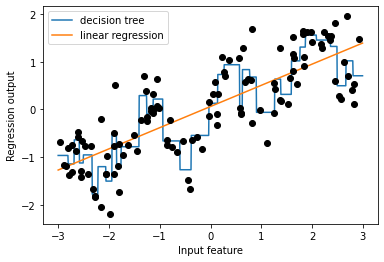

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### 구간 분할 binning ( 이산화 )
한 특성의 입력값을 여러 특성으로 나누는 것
> KBinsDiscretizer : 구간의 경계 정의
* bin_edges_ : 특성별로 경계값 저장

In [19]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


> * __transform__ : 각 데이터 포인트를 해당되는 구간으로 인코딩 → 희소 행렬 생성  
default: one-hot-encoding  


In [20]:
X_binned = kb.transform(X)
X_binned  # 구간 10개 지정 = 변환된 데이터 10차원

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

* 희소 행렬 → 밀집 배열 변환 : 원본 데이터 포인트 VS 인코딩 결과

In [21]:
# wave 데이터셋의 연속형 특성 데이터 포인트를 번주형으로 변환 → 희소 행렬
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [22]:
# 원-핫-인코딩된 밀집 배열
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, 'Input feature')

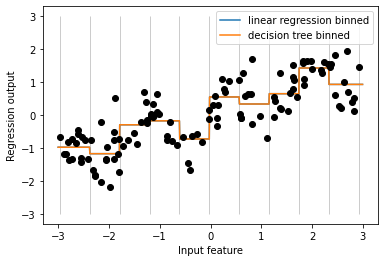

In [23]:
# 원-핫-인코딩된 데이터로 선형 회귀 모델 & 결정 트리 모델 

line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

\- 선형 회귀 모델과 결정 트리가 같은 예측 → 선이 겹쳐짐  
\- 구간별 특성의 값은 상수값으로 예측  
\- 구간으로 특성을 나눈 후: 선형 모델은 유연해짐, 결정 트리는 덜 유연

***
## 4.5 상호작용과 다항식
  
* 선형 모델에 기울기 추가
    * 구간으로 분할된 데이터에 원래 특성 다시 추가

__wave dataset__ 
  
* 분할된 데이터에 원래 특성 (x축) 추가

In [24]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)  # 변환(분할)된 데이터에 원래 특성 추가 = 11차원

(120, 11)


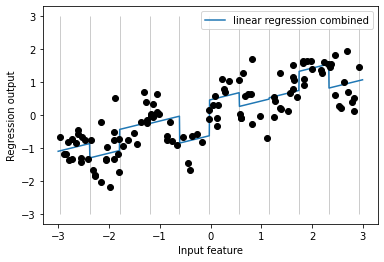

In [29]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

* 각 구간에서 다른 기울기 가지도록 데이터 포인트의 구간 - x축 상호작용 _특성_ 추가
    * 특성 = (구간 특성) X (원본 특성) : 각 구간에 대한 x축 특성의 복사본 

In [30]:
# dataset
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


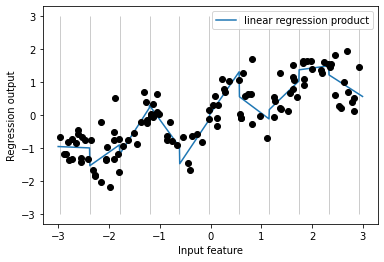

In [31]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

> __연속형 특성을 확장하는 방법__
  1. 구간 나누기
  2. __원본 특성의 다항식 추가__ : PolynomialFeatures

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
poly = PolynomialFeatures(degree=10
                          ,include_bias=False) # default"include_bias=True":절편에 해당하는 1인 특성 추가
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: {}".format(X_poly.shape)) # 10차원 사용 = 10개 특성 생성

X_poly.shape: (120, 10)


In [33]:
# X vs. X_poly

print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [34]:
# 특성의 의미
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


> __다항 회귀__ : 다항식 특성 + 선형 모델  
* 고차원 다항식은 데이터가 부족한 영역에서 민감

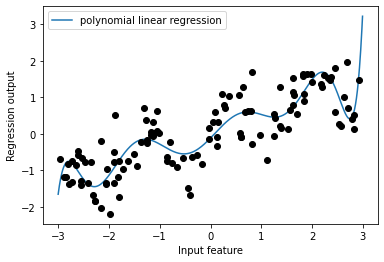

In [35]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

* 비교용) 변환 적용하지 않은 원본 데이터 + SVM 모델

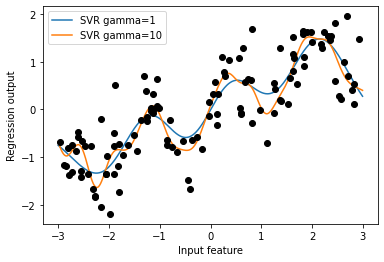

In [36]:
# gamma 매개변수 변화에 따른 비교
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

__Boston Hounsing dataset__ - 상호작용 + 다항식 application

In [38]:

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# dataset
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 차수=2 : 다항식 특성 추출
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


\- 원래 특성 : 13개 → 교차 특성으로 확장 : 105 개  
\- 새로운 특성 : 원래 특성의 제곱 & 가능한 두 특성의 조합

In [39]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


* 상호작용 특성 있는 데이터 vs. 없는 데이터 - 성능 비교: Ridge

In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


* 상호작용 특성 있는 데이터 vs. 없는 데이터 - 성능 비교: Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.783
Score with interactions: 0.774


\- 특성 추가하지 않아도 ridge 성능보다 좋음  
\- 특성 추가하면 오히려 성능 감소

***
## 4.6 일변량 비선형 변환
* 수학 함수 적용한 특성 변환
    * log, exp → 데이터 스케일 변경
    * sin, cos → 주기적 패턴 데이터  
  
  
* 선형 모델 & 신경망 성능 향상
* 정수 카운트 데이터가 정규 분포와 비슷한 분포의 모양이 되도록 만듦

__예시__ (임의의 데이터)

In [42]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))  # 3개의 특성
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

# X[:, 0]

print(X[:10, 0])  # 첫 번째 특성 맨앞 10개

[ 56  81  25  20  27  18  12  21 109   7]


In [43]:
# 각 값이 나타난 횟수
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0]))) 

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

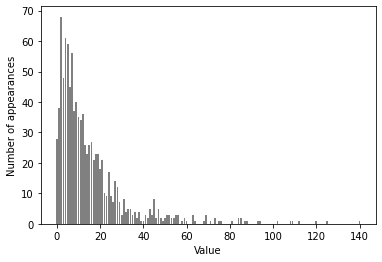

In [44]:
# 히스토그램
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Number of feature appearances:
[17 67 49 66 59 64 46 52 46 36 31 33 35 24 27 33 25 21 17 16 11 11 12 11
 11  8  5  8 10 13  6  8  4  1  6  7  3  6  7  3  5  2  4  5  3  2  5  4
  2  0  1  1  0  4  0  4  2  2  1  0  3  1  1  2  1  0  1  3  3  0  1  0
  0  0  0  1  2  2  0  0  1  0  2  0  0  1  0  0  0  0  0  1  0  0  0  0
  2  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

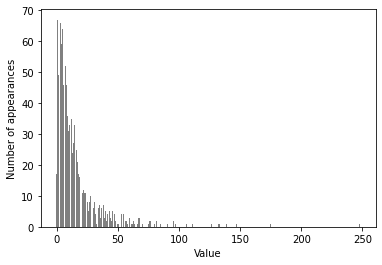

In [45]:
# X[:,1]

print("Number of feature appearances:\n{}".format(np.bincount(X[:, 1]))) 

bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Number of feature appearances:
[15 47 56 71 62 71 61 38 48 42 43 25 26 31 29 24 29 22 16 16 10  4 12 10
 16 13 13  7  5  8  5  8  7  5  2  8  3  3  4  3  8  6  3  3  2  2  1  2
  3  2  0  0  1  3  4  4  1  0  1  2  1  2  2  3  1  1  1  1  0  0  1  3
  0  0  0  1  2  1  2  0  0  1  0  0  0  0  0  0  0  0  1  0  0  1  0  1
  1  0  1  0  0  1  0  0  1  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

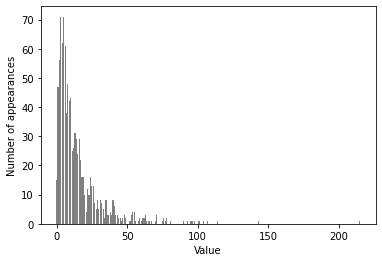

In [46]:
# X[:, 2]

print("Number of feature appearances:\n{}".format(np.bincount(X[:, 2]))) 

bins = np.bincount(X[:, 2])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

* 리지 회귀 적용

In [47]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


\- 낮은 R^2 점수 : X 와 y 관계 제대로 모델링 안됨

* __로그 스케일 변환__ 후 리지 모델

Text(0.5, 0, 'Value')

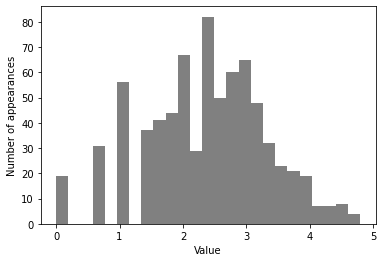

In [48]:
# 로그 스케일 변환
## 데이터에 0 존재 → log(X+1)
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [49]:
# 리지 모델
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


***
## 4.7 특성 자동 선택
가장 유용한 특성만 선택 = 특성의 수 줄이기  
→ 모델 간단히, 성능 향상  
1. 일변량 통계
2. 모델 기반 선택
3. 반복적 선택  
  
: 타깃값 선정 (지도학습) - split data (훈련 세트/테스트 세트) - 훈련 데이터만 특성 선택  
  
### 4.7.1 일변량 통계
* __일변량__ : 각 특성이 독립적으로 평가됨 (분류에서는 분산분석)
    * 다른 특성과 깊게 연관된 특성은 선택되지 않음  
    
  
* 개개인 특성-타깃 사이 중요한 통계적 관계가 있는지 계산  
  
> Scikit-learn:
 * (회귀) f_regression  
(분류) f_classif  
  
  
> * 계산한 p-value 바탕으로 특성 제외 방식 선택
    * 높은 p-value = 타깃값과 연관성 적은 특성 = 제외  
      
   
> * 임계값 조정 매개변수
    * SelectKBest : 고정된 k 개의 특성 선택
    * SelectPercentile : 지정된 비율만큼의 특성 선택

__Cancer dataset__  분류를 위한 특성 선택

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# add noise features to the data : 특성 선택이 의미 없는 노이즈 제거하는지 확인
# first 30 features: dataset / next 50: noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

# 특성 50% 선택 : f_classif & SelectPercentile 
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


\- 특성 개수 감소: 80 → 40 (원본 특성 50%)

> * get_support : 선택된 특성을 불린언 값으로 표시  
→ 선택된 특성 확인

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text major ticklabel objects>)

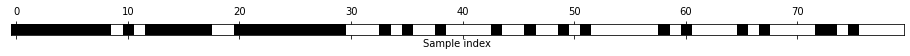

In [51]:
mask = select.get_support()
print(mask)

# visualize the mask (black: True, white: False)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

\- 선택된 특성 대부분은 원본 데이터 (앞쪽)  
\- 노이즈 특성 대부분은 제거됨

* 전체 특성 이용 vs 선택된 특성 이용 - 로지스틱 회귀 성능 비교

In [52]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()

lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.7.2 모델 기반 특성 선택
* 지도 학습 머신러닝 모델 사용  
→ 특성의 중요도 평가, 순서 매김  
→ 가장 중요한 특성들만 선택  
    * 결정트리 기반 모델  __feature_importances___ : 각 특성의 중요도 제공
    * 선형 모델 계수의 절댓값
  
  
* 최종 학습을 위해 사용할 지도 학습 모델과 같은 머신러닝 모델 사용할 필요 없음
* 한 번에 모든 특성 고려

> SelectFromModel
* 중요도가 임계치보다 큰 모든 특성 선택

__Cancer dataset__ : Random Forest (트리 100개), 임계치 = 중앙값  
일변량 분석으로 선택한 특성과 결과 비교

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

# model
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text major ticklabel objects>)

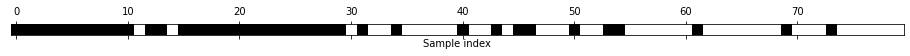

In [54]:
# visualize mask (black:True, white:False)
mask = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

\- 40개의 특성이 선택되도록 설정  
\- 일부 노이즈 선택

In [55]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.7.3 반복적 특성 선택
특성의 수가 각기 다른 일련의 모델 형성
1. 특성을 하나도 __선택하지 않고 시작__  
 → (어떤 종료 조건 도달할때까지) 특성 하나씩 __추가__  
  
  
2. __모든__ 특성을 가지고 시작  
→ (어떤 종료 조건 도달할때까지) 특성 하나씩 __제거__
    * __재귀적 특성 제거__ : 중요도가 낮은 특성 제거 후 나머지 특성으로 새로운 모델 생성  
    → 미리 정의한 특성 갯수 남을 때까지

__Cancer dataset__ : Random Forest (트리 100개), 80개 특성 중 40개 선택

([], <a list of 0 Text major ticklabel objects>)

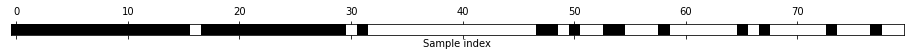

In [56]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

* 로지스틱 회귀 정확도

In [57]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* 선택된 특성만 사용 → RFE에 사용된 모델 이용해 예측

In [58]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


***
## 4.8 전문가 지식 활용  
  

__앤디 집 앞 자전거 예측__

In [64]:
citibike = mglearn.datasets.load_citibike()

print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

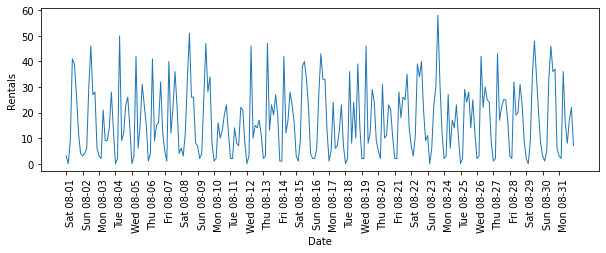

In [65]:
# 8월 한달 동안 대여 횟수

plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [66]:
# target values (number of rentals)
y = citibike.values

# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

# split data
## first 184 data points: training, rest: testing
n_train = 184

# 주어진 특성 이용해 평가 & visualize
def eval_on_features(features, target, regressor):
    # split features: training / test set
    X_train, X_test = features[:n_train], features[n_train:]
    # split target
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    




* __랜덤 포레스트__

Test-set R^2: -0.04


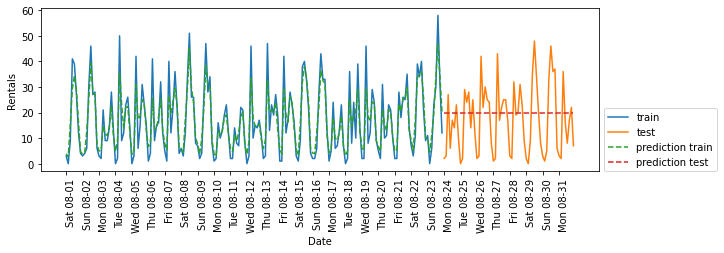

In [67]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

\- 훈련 예측: 매우 정확  
\- 테스트 예측: 학습되지 않음 (R^2: -0.04)  
  
→ 테스트 세트의 시간 특성이 훈련 세트의 특성 값 범위 밖에 있기 때문  
( 테스트 세트의 데이터 포인트가 훈련 세트의 모든 데이터보다 뒤의 시간 )  
  
  
→ 테스트 세트와 가장 가까운 마지막 훈련 세트 데이터의 타깃값 = 예측

* __전문가 지식 활용 - 시간, 요일 특성 추가__  
  
아무것도 학습되지 않는 POSIX 시간 특성 제거

Test-set R^2: 0.60


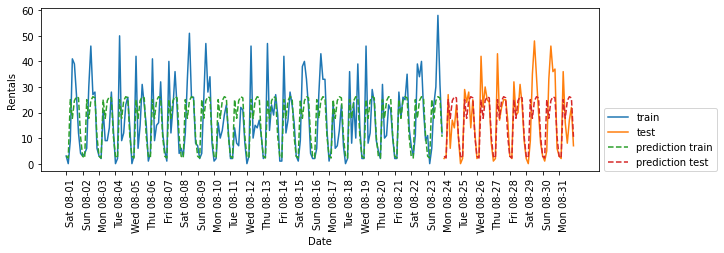

In [68]:
# 시간만 사용 
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


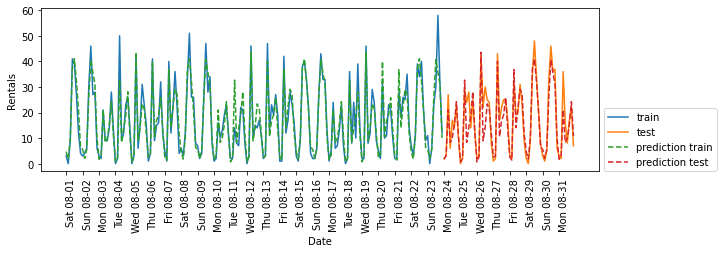

In [69]:
# 요일 추가
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

* 더 간단한 __Linear Regression 적용__ (시간 & 요일 반영)

Test-set R^2: 0.13


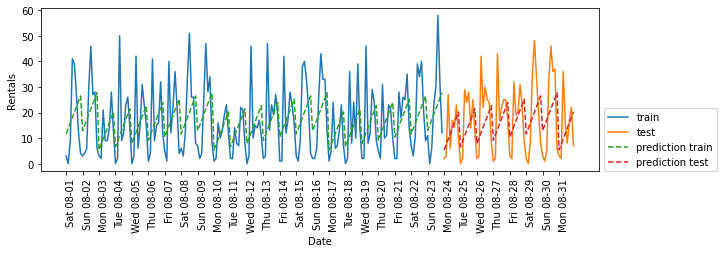

In [70]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

\- 요일, 시간 : 정수로 인코딩 → 연속형 범주로 해석됨  
    
\- 선형 모델은 시간을 선형 함수로만 학습 → 시간이 흐를수록 대여 수 늘어나게 학습  
  
__→ OneHotEncoder : 정수형 (요일, 시간)을 범주형으로 해석__

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Test-set R^2: 0.62


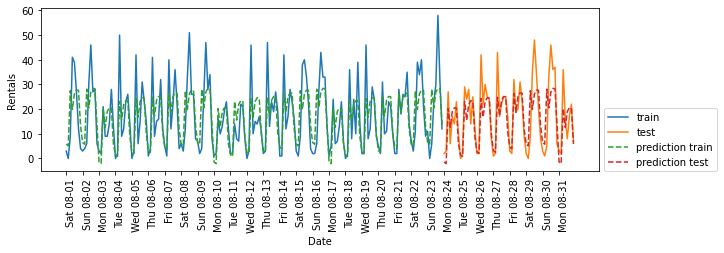

In [71]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

\- 요일마다 하나의 계수 학습  
\- 시간마다 하나의 계수 학습 
  
→ 시간 패턴이 모든 날에 걸쳐 공유  
* 상호작용 특성 : 시간 & 요일 조합별 계수 학습

Test-set R^2: 0.85


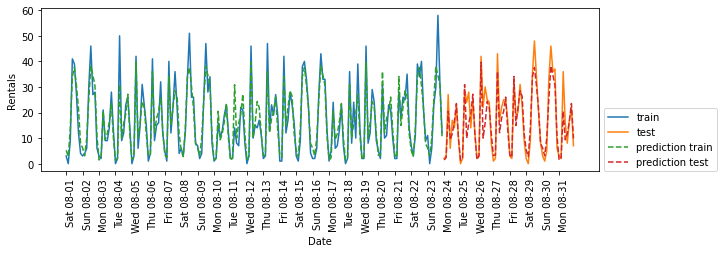

In [72]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

→ 모델이 학습한 계수를 그래프로

Text(0, 0.5, 'Feature magnitude')

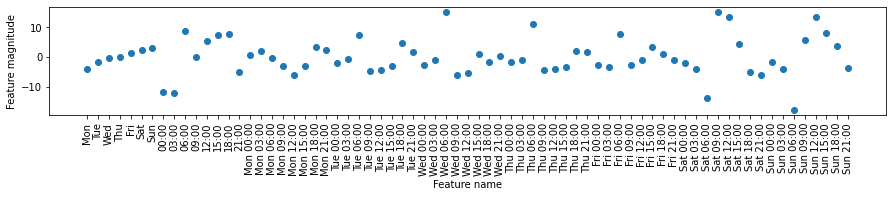

In [73]:
# 시간, 요일 특성의 이름 지정
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

# 모든 상호작용 특성에 이름 지정
features_poly = poly_transformer.get_feature_names(features)

# 계수가 0이 아닌 특성만 선택
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

# 선형 모델에서 학습한 계수 plot
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")